In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter, WeekdayLocator, DayLocator

In [35]:
#load listing dataset 
listing_df = pd.read_csv('~/Desktop/seattle/listings.csv')

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [4]:
#load calendar dataset
calendar_df = pd.read_csv('~/Desktop/seattle/calendar.csv')

In [5]:
#1.What does the monthly average price of available listings look like in Seattle?
years = YearLocator()   # every year
months = MonthLocator()  # every month
days = DayLocator()  # every day
yearsFmt = DateFormatter('Y%')
monthsFmt = DateFormatter('%Y-%m')

apartments = calendar_df[(calendar_df.available == 't')]
rm_dollar = lambda x : str(x).replace("$","")
apartments["price"] = apartments["price"].apply(rm_dollar) #remove dollar sign 
apartments["price"] = apartments["price"].convert_objects(convert_numeric=True) #convert object to numeric 

apartments = apartments[['date', 'price']] #extract tow columns from apartments 
avg_prices = apartments.groupby(['date']).mean() #extract mean price group by data 


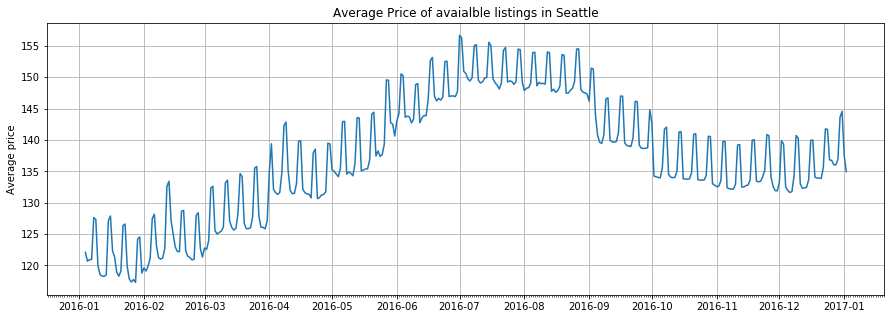

In [26]:
dates = pd.to_datetime(avg_prices.index.values, errors='ignore')

fig, axs = plt.subplots(1, 1)
axs.plot_date(dates, avg_prices.price.tolist(),'-')

# format the ticks
axs.xaxis.set_major_locator(months)
axs.xaxis.set_major_formatter(monthsFmt)
axs.xaxis.set_minor_locator(days)
axs.grid(True)
axs.set_ylabel('Average price')
axs.set_title('Average Price of avaialble listings in Seattle')

fig.set_size_inches(15, 5) 
plt.show()

In [16]:
#2. How many listings are available by month in 2016?

apartments = calendar_df[(calendar_df.available == 't')]
m_dollar = lambda x : str(x).replace("$","")
apartments["price"] = apartments["price"].apply(rm_dollar) #remove dollar sign 
apartments["price"] = apartments["price"].convert_objects(convert_numeric=True) #convert object to numeric 


#Get year from date represented as a string 
def get_year_from_date(row):
    return int(row['date'].split('-')[0])

#Get month from date represented as a string 
def get_month_from_date(row):
    return int(row['date'].split('-')[1])

apartments['year'] = apartments.apply(lambda row: get_year_from_date(row),axis=1)
apartments['month'] = apartments.apply(lambda row : get_month_from_date(row),axis=1)


new_apartments = apartments[['month','listing_id','year']] #extract month, lisitng_id and year from the data

number_of_listings_by_month = []

#extract unique listing_id by month using for loops 
for i in range(1, 13): 
    number_of_listings_by_month.append(len(new_apartments[(apartments['month'] == i) & (new_apartments['year'] == 2016)]['listing_id'].unique()))

number_of_listings_by_month = pd.DataFrame(number_of_listings_by_month)
number_of_listings_by_month.index = number_of_listings_by_month.index+1 #reset index which starts from 1
number_of_listings_by_month.columns = ['available listings']
number_of_listings_by_month

,available listings
1,2868
2,2895
3,2950
4,3002
5,2705
6,2720
7,2503
8,2561
9,2649
10,2694


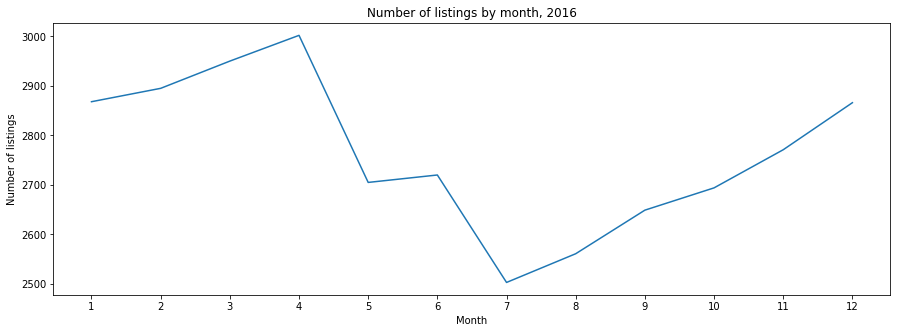

In [28]:
plt.figure(figsize=(15,5))
plt.plot(number_of_listings_by_month)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Number of listings')
plt.xlabel('Month')
plt.title('Number of listings by month, 2016')
plt.savefig('Number of listings by month')
plt.show()

In [17]:
#3.Is there any relationship between the average price of the listings and the listings’ neighborhood?


get_neighbourhood = listing_df[['neighbourhood_group_cleansed','price']]
get_neighbourhood["price"] = get_neighbourhood["price"].apply(rm_dollar)
get_neighbourhood["price"] = get_neighbourhood["price"].convert_objects(convert_numeric=True)

neighbourhood_price = get_neighbourhood.groupby(['neighbourhood_group_cleansed']).mean()
neighbourhood_price.rename(columns = {'price':'avg_price'}, inplace = True)
neighbourhood_price

,avg_price
neighbourhood_group_cleansed,
Ballard,124.682609
Beacon Hill,94.669492
Capitol Hill,130.592593
Cascade,140.101124
Central Area,128.338753
Delridge,83.278481
Downtown,154.405660
Interbay,109.727273
Lake City,92.671642


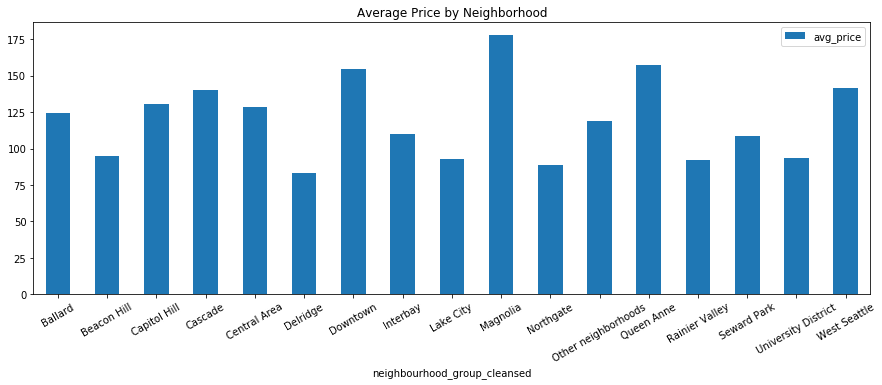

In [37]:
plt.rcParams["figure.figsize"] = [15,5]
neighbourhood_price.plot.bar(width=0.5, rot=30, title = "Average Price by Neighborhood")

In [20]:
#4 Are there any other variables that have a strong relationship with the price of listings?

new_listing_df = listing_df.copy()
new_listing_df["price"] = new_listing_df["price"].apply(rm_dollar)
new_listing_df['price'] = new_listing_df['price'].convert_objects(convert_numeric=True)

new_listing_df = new_listing_df[new_listing_df.applymap(np.isreal)] # extract only numeric columns 
new_listing_df.dropna(how = "all", axis = 1, inplace = True)
# It still has nan values so, I have to replace these values with np.nan. These nan vlaues might be removed after that.

new_listing_df.replace(["NaN"], np.nan, inplace = True)
new_listing_df = new_listing_df.dropna()
new_listing_df = new_listing_df.drop(['id','scrape_id','host_id'], axis=1) #Just remove useless columns 


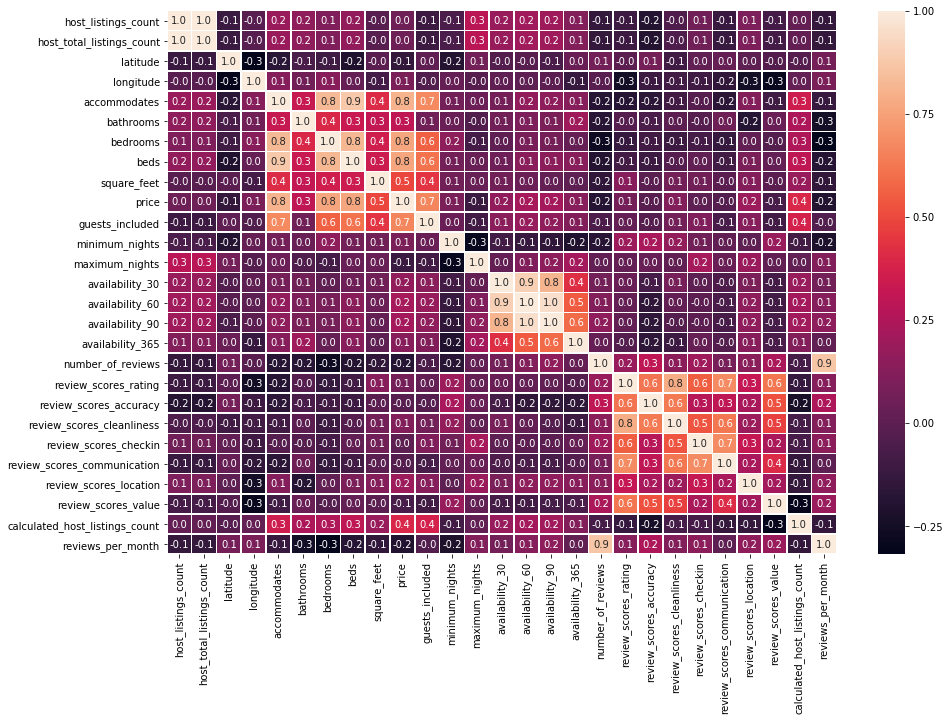

In [38]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_listing_df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax) 
plt.savefig('Corr')
plt.show()

#corr with price 
#1.accomodation 2.bedrooms 3.bathrooms 4.guests_include 5.sqaure_feet 6. calculated_host_listings_count 7. bathrooms 